<a href="https://colab.research.google.com/github/Abree1234/skills-introduction-to-github/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codearea/Iris.csv')  # Replace with your path if needed
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


remove id column

In [ ]:

# Drop the 'Id' column if it exists
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data types:
 SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [ ]:

# Encode target variable
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['Species'])

# Final dataset
df.head()
df.shape

(150, 6)

EDA

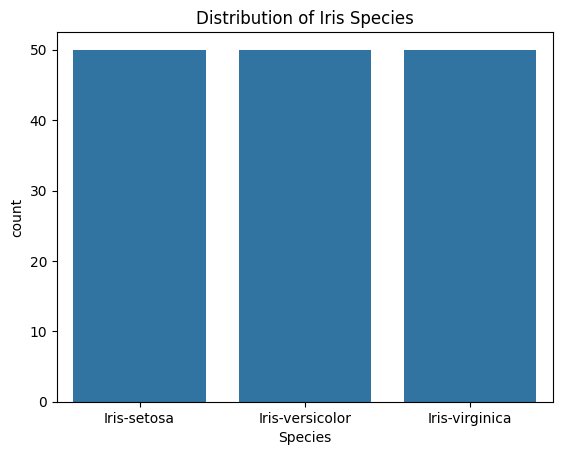

In [ ]:

sns.countplot(x='Species', data=df)
plt.title('Distribution of Iris Species')
plt.show()

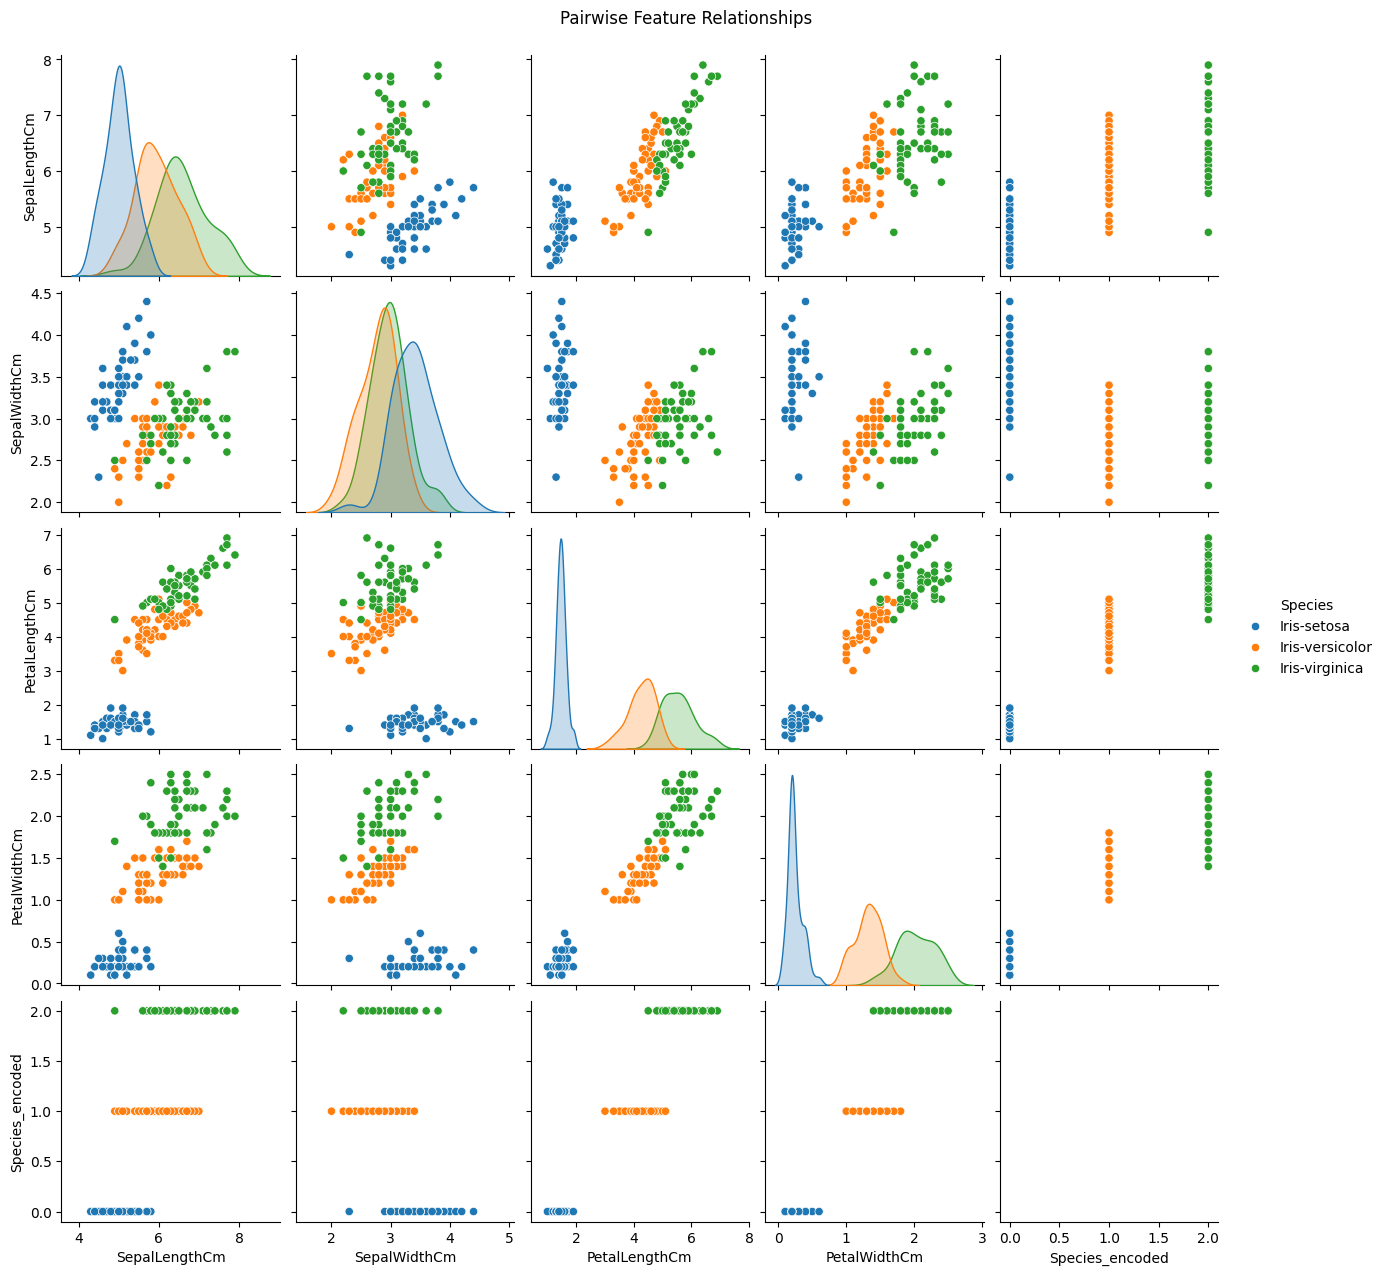

In [ ]:

sns.pairplot(df, hue='Species')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

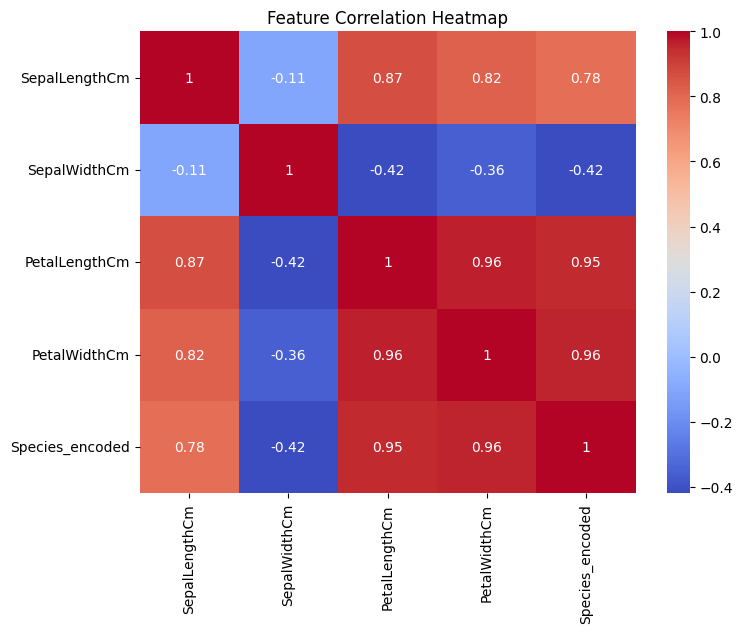

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

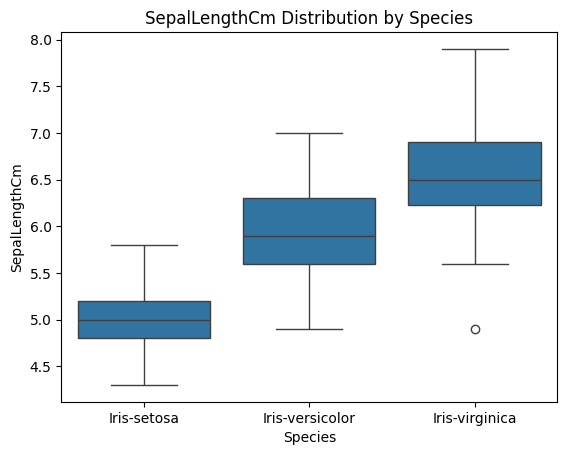

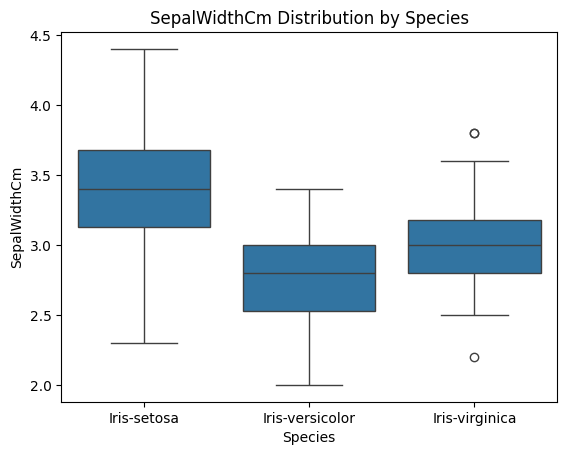

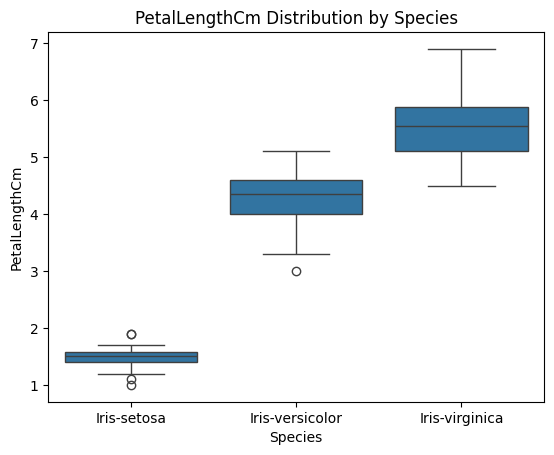

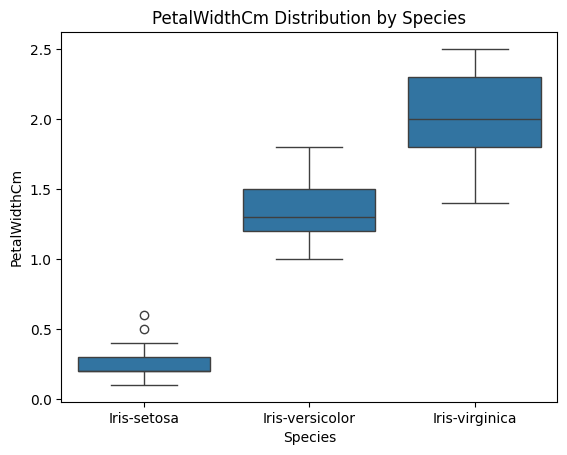

In [ ]:

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for feature in features:
    plt.figure()
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'{feature} Distribution by Species')
    plt.show()

Preprocess

In [ ]:

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [ ]:

# List of feature columns to check for outliers
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [ ]:

# Apply the IQR-based outlier removal
df_cleaned = remove_outliers_iqr(df, numeric_cols)

In [ ]:

# Compare dataset size before and after outlier removal
print("Original shape:", df.shape)
print("After removing outliers:", df_cleaned.shape)

Original shape: (150, 6)
After removing outliers: (146, 6)


In [ ]:

le = LabelEncoder()
y_encoded = le.fit_transform(df_cleaned['Species'])  # ✔️ Encoded target

In [ ]:
df_cleaned['Species_encoded'] = y_encoded

In [ ]:

X = df_cleaned[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df_cleaned['Species_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Use stochastic gradient descent as optimization method
model = MLPClassifier(solver='sgd', max_iter=500, learning_rate_init=0.1, hidden_layer_sizes=(5, 3), random_state=42)
from sklearn.ensemble import RandomForestClassifier

# Train the model
#model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Create and train the SVM model
#svm_model = SVC(kernel='linear', C=1.0, random_state=42)
#svm_model.fit(X_train, y_train)

# Predict using the test set
#y_pred_svm = svm_model.predict(X_test)

MLPClassifier(hidden_layer_sizes=(5, 3), learning_rate_init=0.1, max_iter=500,
              random_state=42, solver='sgd')

In [ ]:

# Evaluate the model
#print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
#print("\nSVM Classification Report:")
#print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9666666666666667

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


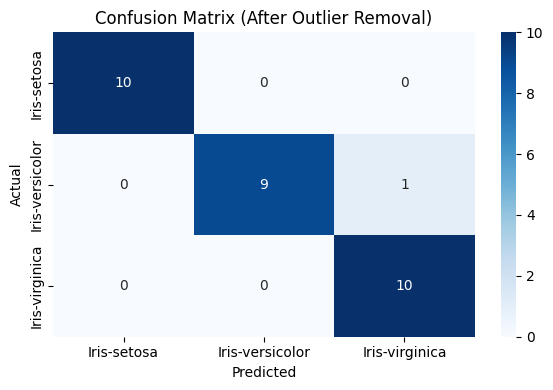

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (After Outlier Removal)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Correct Predictions (Diagonal):


Iris-setosa: All 10 samples were correctly predicted (100% accuracy).

Iris-versicolor: 9 out of 10 were correctly predicted.

Iris-virginica: All 10 samples were correctly predicted (100% accuracy).

  
Misclassifications (Off-diagonal):


1 Iris-versicolor was misclassified as Iris-virginica.

In [ ]:
!pip install gradio --quiet

In [ ]:

import gradio as gr

# Prediction function
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
    input_scaled = scaler.transform(input_data)
    pred_index = model.predict(input_scaled)[0]
    return le.inverse_transform([pred_index])[0]

# Gradio interface
iface = gr.Interface(
    fn=predict_species,
    inputs=[
        gr.Number(label="Sepal Length (cm)"),
        gr.Number(label="Sepal Width (cm)"),
        gr.Number(label="Petal Length (cm)"),
        gr.Number(label="Petal Width (cm)")
    ],
    outputs=gr.Text(label="Predicted Iris Species"),
    title="🌼 Iris Flower Classifier",
    description="Enter flower measurements to predict its species."
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://99bf00384ef016647d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
